Author: Ond\v{r}ej Podsztavek

# Introduction

This project address the problem of hyperparameter optimization or model selection problem with Kolomogorov Complexity. Concretelly, it is focused determining the best number of [K-means](https://cs.wikipedia.org/wiki/K-means) clusters using the minimum description length principle.

## Minimum Description Length Principle (MDL)

The best theory to describe observed data is the one which minimizes the sum of the description length (in bits) of:

- the theory description,
- the data encoded from the theory,

MDL is provided by formula:

$$\hat{H} = \arg \min_{H_i} \{C(H_i) + C(D|H_i)\},$$

where $\hat{H}$ is the optimal theory, $C(\cdot)$ computes Kolomogorov complexity, $H_i$ are proposed theories and $D$ are the data to be encoded from the theories.

## Unsupervised Learning

Unsupervised learning is in some sence compression. In both clustering and anomaly detection the problem is to find structure in given data, but finding stucture means compressing the desription of data.

The aim of this project is to predict the best number of clusters in a data using MDL. Given decision function $h: \mathcal{X} \to \mathcal{Y}$ (k-means), where $\mathcal{X}$ and $\mathcal{Y}$ are input and output space respectively, and $\mathcal{D}_S = \{(x_1, y_1), \dots, (x_n, y_n)\}$ is training set. A $\hat{h}$ decision function should be found (k-means number of clusters and positions) such that:

$$\hat{h} = \arg \min_{h} \{C(h) + C(\mathcal{D}_S|h)\}.$$

The problem is that $C(\cdot)$ is not computable. Therefore robust approximation need to be found.

## Proposed Approach

TODO

# Experiments

All experiments were carried out on the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

In [1]:
import numpy
from matplotlib import pyplot
from sklearn import datasets, cluster, metrics, preprocessing

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
X = iris.data
labels = numpy.unique(iris.target)
n_features = X.shape[1]
labels, n_features

(array([0, 1, 2]), 4)

In [4]:
def calculate_complexities(X, max_clusters=20):
    ks = numpy.arange(1, 12)
    complexities = numpy.zeros((len(ks), 2))

    for k in ks:
        # TODO the random_state?
        kmeans = cluster.KMeans(n_clusters=k, random_state=0)
        # fit the model
        kmeans.fit(X)
        # compute the distances to cluster centers
        distances = metrics.pairwise.euclidean_distances(X, kmeans.cluster_centers_)
        # get the only distances to nearest cluster center
        shortest_distances = distances[numpy.arange(len(distances)), kmeans.labels_]
        # approximate the complexity by distance to nearest cluster center
        # TODO is the log1p correct?
        representation_length = numpy.log1p(shortest_distances)
        # TODO what about n_features * log(distance_to_cluster_center)?
        points_complexity = numpy.sum(representation_length)
        
        # calculate the model complexity
        origin = numpy.zeros((1, n_features))
        center_distances = metrics.pairwise.euclidean_distances(kmeans.cluster_centers_, origin)
        model_complexity = numpy.sum(numpy.log1p(center_distances))
        
        complexities[k - 1] = [points_complexity, model_complexity]

    return ks, complexities

ks, complexities = calculate_complexities(X)
for k, (points_complexity, model_complexity) in zip(ks, complexities):
    print(k, '\t', points_complexity + model_complexity)

1 	 156.62678816
2 	 91.4885769893
3 	 78.8220829184
4 	 73.1967726338
5 	 71.3118343161
6 	 69.0664112961
7 	 68.1857949496
8 	 68.1578614277
9 	 68.1936340256
10 	 69.9329830158
11 	 69.9976858413


Text(0.5,1,'Original Data')

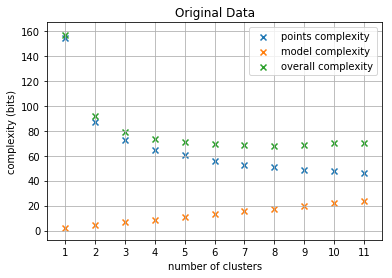

In [5]:
def plot_complexities(ks, complexities):
    pyplot.scatter(ks, complexities[:, 0], marker='x', label='points complexity')
    pyplot.scatter(ks, complexities[:, 1], marker='x', label='model complexity')
    pyplot.scatter(ks, numpy.sum(complexities, axis=1), marker='x', label='overall complexity')
    pyplot.xticks(ks)
    pyplot.legend()
    pyplot.grid(True)
    pyplot.xlabel('number of clusters')
    pyplot.ylabel('complexity (bits)')

plot_complexities(ks, complexities)
pyplot.title('Original Data')

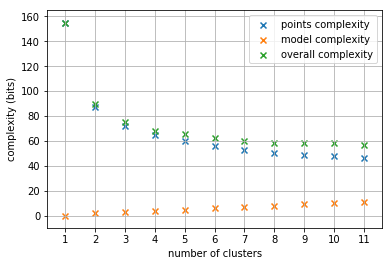

In [6]:
scaled_X = preprocessing.StandardScaler(with_std=False).fit_transform(X)
plot_complexities(*calculate_complexities(scaled_X))

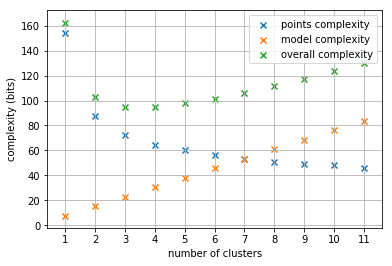

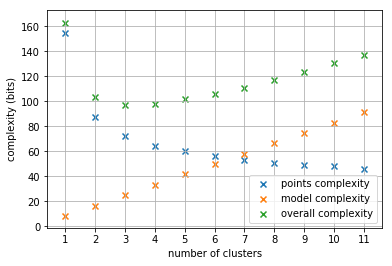

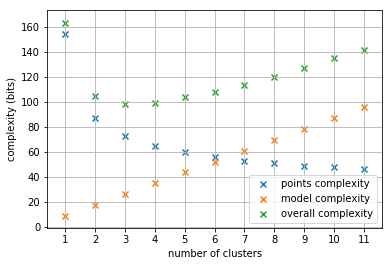

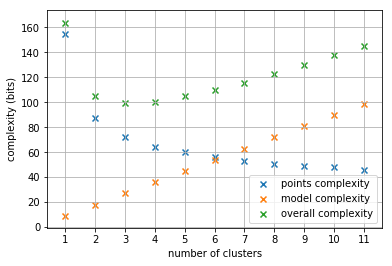

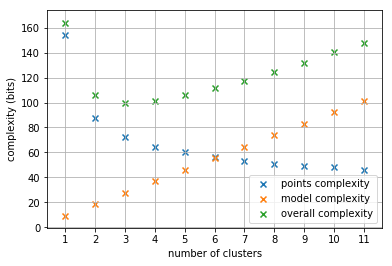

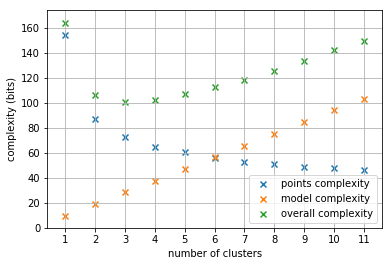

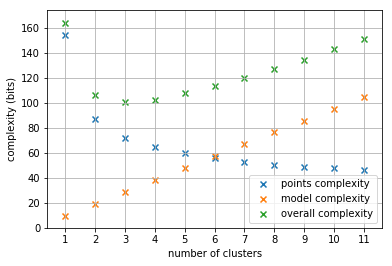

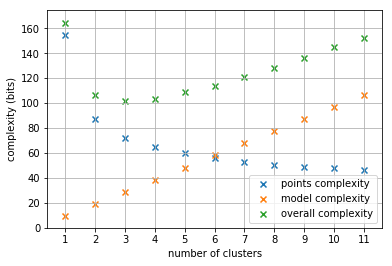

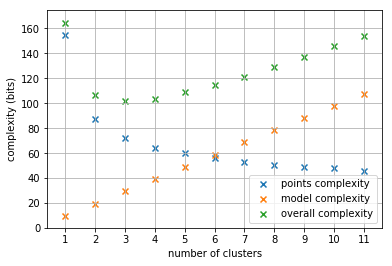

In [7]:
for move in range(1000, 10000, 1000):
    moved_X = X + move
    plot_complexities(*calculate_complexities(moved_X))
    pyplot.show()

Text(0.5,1,'Moved Points')

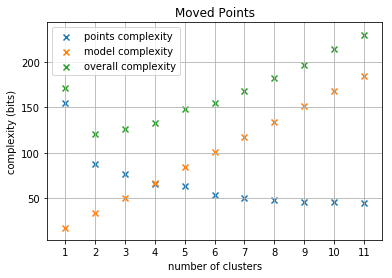

In [8]:
moved_X = X + 10000000
plot_complexities(*calculate_complexities(moved_X))
pyplot.title('Moved Points')

# Conclusion

TODO